In [97]:
# dataset
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data: list, index):
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=1)
    radio_data = get_column(data, 1)

    # get newspaper (index=2)
    newspaper_data = get_column(data, 2)

    # get sales (index=3)
    sales_data = get_column(data, 3)

    # building X input  and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data

    return X,y

In [98]:
#Multiple choices:
#Question 1:
X,y = prepare_data('/content/drive/MyDrive/Colab Notebooks/Linear Regression/advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


In [99]:
print(X, y)

[[230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8, 66.1, 214.7, 23.8, 97.5, 204.1, 195.4, 67.8, 281.4, 69.2, 147.3, 218.4, 237.4, 13.2, 228.3, 62.3, 262.9, 142.9, 240.1, 248.8, 70.6, 292.9, 112.9, 97.2, 265.6, 95.7, 290.7, 266.9, 74.7, 43.1, 228.0, 202.5, 177.0, 293.6, 206.9, 25.1, 175.1, 89.7, 239.9, 227.2, 66.9, 199.8, 100.4, 216.4, 182.6, 262.7, 198.9, 7.3, 136.2, 210.8, 210.7, 53.5, 261.3, 239.3, 102.7, 131.1, 69.0, 31.5, 139.3, 237.4, 216.8, 199.1, 109.8, 26.8, 129.4, 213.4, 16.9, 27.5, 120.5, 5.4, 116.0, 76.4, 239.8, 75.3, 68.4, 213.5, 193.2, 76.3, 110.7, 88.3, 109.8, 134.3, 28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9, 25.0, 90.4, 13.1, 255.4, 225.8, 241.7, 175.7, 209.6, 78.2, 75.1, 139.2, 76.4, 125.7, 19.4, 141.3, 18.8, 224.0, 123.1, 229.5, 87.2, 7.8, 80.2, 220.3, 59.6, 0.7, 265.2, 8.4, 219.8, 36.9, 48.3, 25.6, 273.7, 43.0, 184.9, 73.4, 193.7, 220.5, 104.6, 96.2, 140.3, 240.1, 243.2, 38.0, 44.7, 280.7, 121.

In [100]:
import plotly.express as px
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Linear Regression/advertising.csv')
px.scatter_matrix(df)

In [101]:
# compute output and loss
def predict(x1, x2, x3, w1, w2, w3, b):
    return w1*x1 + w2*x2 + w3*x3 + b

def compute_loss_mse(y_hat, y):
    return (y_hat-y)**2

def compute_loss_mae(y_hat, y):
    return abs(y_hat-y)

# compute gradient
def compute_gradient_wi(xi, y, y_hat):
    return 2*xi*(y_hat-y)

def compute_gradient_b(y, y_hat):
    return 2*(y_hat-y)

# update weights
def update_weight_wi(wi, dl_dwi, lr):
    return wi-lr*dl_dwi

def update_weight_b(b, dl_db, lr):
    return b-lr*dl_db

# initialize parameters
def initialize_params():
    # w1 = random.gauss(mu=0.0, sigma=0.01)
    # w2 = random.gauss(mu=0.0, sigma=0.01)
    # w3 = random.gauss(mu=0.0, sigma=0.01)
    # b  = 0
    return (0.016992259082509283, 0.0070783670518262355,
            -0.002307860847821344, 0)

def implement_linear_regression(X_data, y_data, max_epoch=50, lr=1e-5):
    X_data = np.array(X_data)
    y_data = np.array(y_data)

    losses = []
    N = len(y_data)

    # initialize parameters
    w1, w2, w3, b = initialize_params()
    for epoch in range(max_epoch):
        for i in range(N):
            # get sample data
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]
            # predict
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            # compute loss
            loss = compute_loss_mae(y_hat, y)
            # compute gradient
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)
            # update weights
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)
            # logging (ghi nhật kí)
            losses.append(loss)
    return (w1, w2, w3, b, losses)

In [102]:
#Multiple choices:
#Question 2:
y_p = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y_p)

1.0


In [103]:
#Multiple choices:
#Question 3:
l = compute_loss(y_hat=1, y=0.5)
print(l)

0.25


In [104]:
#Multiple choices:
#Question 4:
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


In [105]:
#Multiple choices:
#Question 5:
g_b =  compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


In [106]:
#Multiple choices:
#Question 6:
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(after_wi)

1.000005


In [107]:
#Multiple choices:
#Question 7:
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)

0.50001


In [108]:
w1, w2, w3, b, losses = implement_linear_regression(X, y)
print(losses)

[18.082222881224823, 4.100446455578595, 7.282275385954624, 3.016242893839479, 1.9085153405636603, 2.7502277833362605, 4.7603671765945625, 0.5388502381156339, 3.8520835252082533, 4.906761601511965, 6.354234412581848, 2.2642615486296584, 3.6767135344364377, 5.409273005405192, 2.5096290392217497, 3.026970419836779, 0.1630320877454139, 5.167849372557676, 5.620322538555706, 2.701696997199175, 2.208693417023415, 0.2567000330823639, 2.1585719654856748, 2.8631953301864606, 3.2751796403469298, 6.847518202281428, 6.082913735338986, 2.8188027334945467, 3.6321420814643908, 3.604869548323613, 1.9216810658798806, 2.99058982107068, 5.49376441172527, 3.3810754627532127, 6.0145129821966155, 2.731351066852909, 9.30867842952891, 2.3173560638000907, 2.31339944462937, 6.8071086928058335, 1.5929327317453321, 1.1900203756196053, 2.5895954051967536, 3.9109538958604944, 3.150155603920962, 0.21537102935861085, 1.318559582330682, 1.2803315280072347, 3.066856128684691, 2.4326160152979837, 0.4767447263521447, 2.77

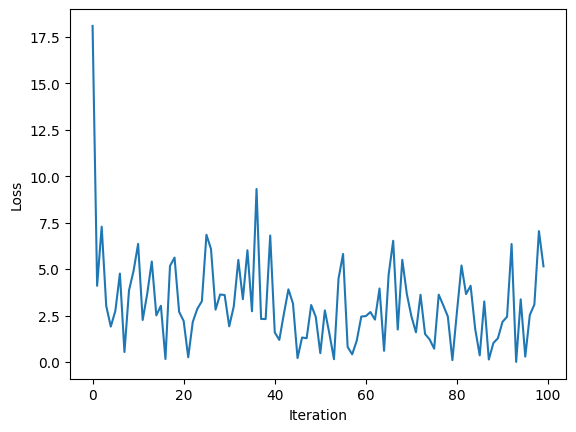

In [109]:
plt.plot(losses[:100])
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [110]:
#Multiple choices:
#Question 8:
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
print(w1,w2,w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [111]:
#Multiple choices:
#Question 9:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3

(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


In [112]:
l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


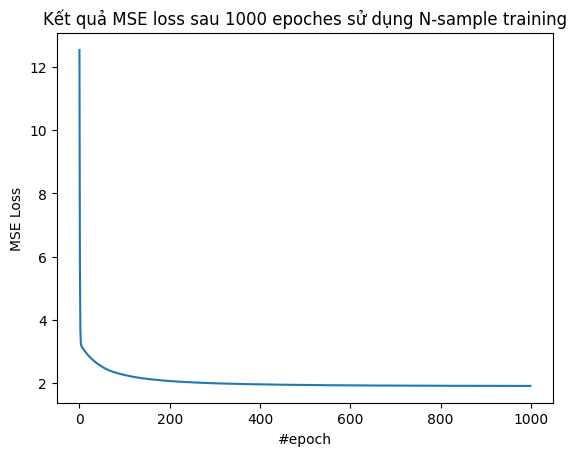

In [115]:
# Implement the linear regression with N-sample training
def implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5):
    losses = []

    # Initialize parameters
    w1, w2, w3, b = initialize_params()
    N = len(y)

    # Training loop for epochs
    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        # Loop through all samples
        for i in range(N):
            # Get a sample
            x1 = X[0][i]
            x2 = X[1][i]
            x3 = X[2][i]
            y_sample = y[i]

            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss
            loss = compute_loss_mae(y_sample, y_hat)

            # Accumulate loss
            loss_total += loss

            # Compute gradients
            d1_dw1 = compute_gradient_wi(x1, y_sample, y_hat)
            d1_dw2 = compute_gradient_wi(x2, y_sample, y_hat)
            d1_dw3 = compute_gradient_wi(x3, y_sample, y_hat)
            d1_db = compute_gradient_b(y_sample, y_hat)

            # Accumulate gradient w1, w2, w3, b
            dw1_total += d1_dw1
            dw2_total += d1_dw2
            dw3_total += d1_dw3
            db_total += d1_db

        # Update parameters
        w1 -= lr * dw1_total / N
        w2 -= lr * dw2_total / N
        w3 -= lr * dw3_total / N
        b -= lr * db_total / N

        # Logging
        losses.append(loss_total / N)

    return (w1, w2, w3, b, losses)

# Training using the N-sample approach
w1, w2, w3, b, losses = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)

# Plotting the loss
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.title("Kết quả MSE loss sau 1000 epoches sử dụng N-sample training")
plt.show()

In [120]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=50,
                                                               lr=1e-5)
print(w1, w2, w3)

0.0777391352775665 0.056447699046257765 0.04135488482198376


epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49


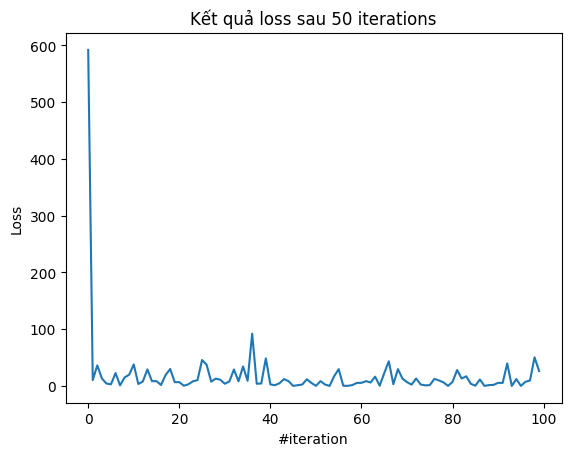

In [131]:
# Importing necessary libraries
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to extract a specific column from the data
def get_column(data, index):
    return [row[index] for row in data]

# Function to prepare the data
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    # Get tv, radio, newspaper, and sales data
    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)

    # Create list of features for input
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X, y

# Initialize the parameters
def initialize_params():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    #return [bias, w1, w2, w3]
    return [0,-0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]

# Predict output by using y = x0*b + x1*w1 + x2*w2 + x3*w3
def predict(X_features, weights):
    # Calculate predicted value as the dot product of features and weights
    result = sum([x * w for x, w in zip(X_features, weights)])
    return result

# Compute loss
def compute_loss(y_hat, y):
    return (y_hat - y) ** 2

# Compute gradient
def compute_gradient_w(X_features, y, y_hat):
    # Calculate gradient for each weight
    dl_dweights = [-2 * (y - y_hat) * x for x in X_features]
    return dl_dweights

# Update weights
def update_weight(weights, dl_dweights, lr):
    # Update each weight using the learning rate and the gradient
    updated_weights = [w - lr * dw for w, dw in zip(weights, dl_dweights)]
    return updated_weights

# Implement linear regression
def implement_linear_regression(X_feature, y_output, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_output)

    for epoch in range(epoch_max):
        print("epoch", epoch)

        for i in range(N):
            # Get a sample - row i
            features_i = X_feature[i]
            y = y_output[i]

            # Compute output
            y_hat = predict(features_i, weights)

            # Compute loss
            loss = compute_loss(y_hat, y)

            # Compute gradient w1, w2, w3, b
            dl_dweights = compute_gradient_w(features_i, y, y_hat)

            # Update parameters
            weights = update_weight(weights, dl_dweights, lr)

            # Logging
            losses.append(loss)

    return weights, losses

# Preparing data using the provided CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Linear Regression/advertising.csv'
X, y = prepare_data(file_path)

# Training using the linear regression approach
weights, losses = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)

# Plotting the loss
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.title("Kết quả loss sau 50 iterations")
plt.show()

In [132]:
print(losses[9999])

31.339223408109948
